<a href="https://colab.research.google.com/github/tuomaseerola/music21/blob/master/ScoreAnalysis_Demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music21 Score Analysis Example**

*Tuomas Eerola, Durham University*

**1 Build music21 environment in Colab**

First we build the virtual machine needed to run music21 in our browser.

### **1.1 Install Music21 and other elements needed to run the environment**
Press play and wait for all commands to be executed - this initial command might take some time as it needs to build the musi21 environment.

In [ ]:
!pip install --upgrade music21
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore
!apt-get install xvfb
!sh -e /etc/init.d/x11-common start
import os
os.putenv('DISPLAY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

# 1 Score example

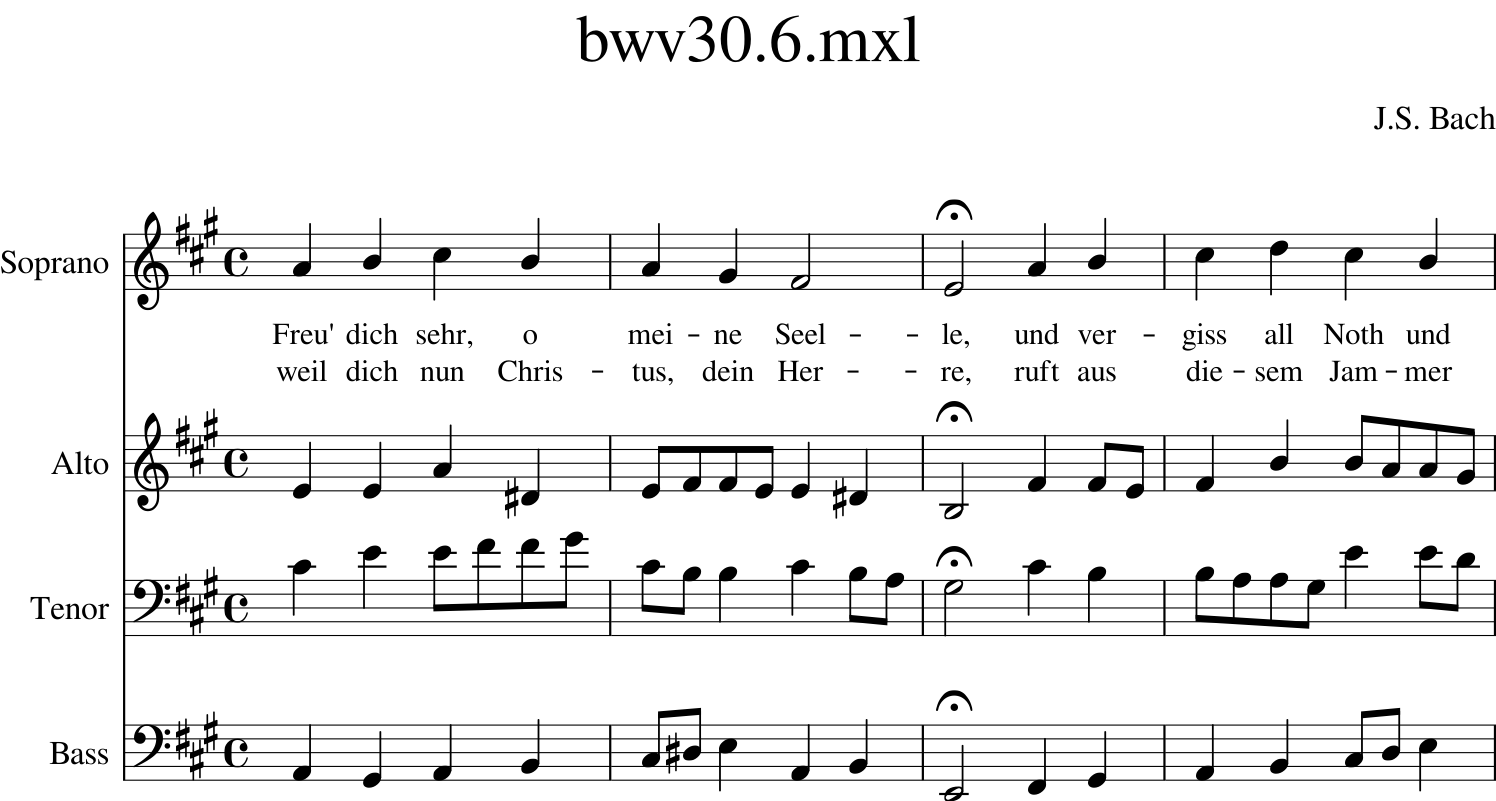

In [2]:
from music21 import * 
bwv30_6 = corpus.parse('bach/bwv30.6.xml') # We "parse" one specific work from the corpus which in this case will be a work by Beethoven
bwv30_6.measures(1, 4).show() # This command lets us specify the number of bars (measures) we want to display, in this case we want to see bars 1 to 4

# 1 Harmonic analysis

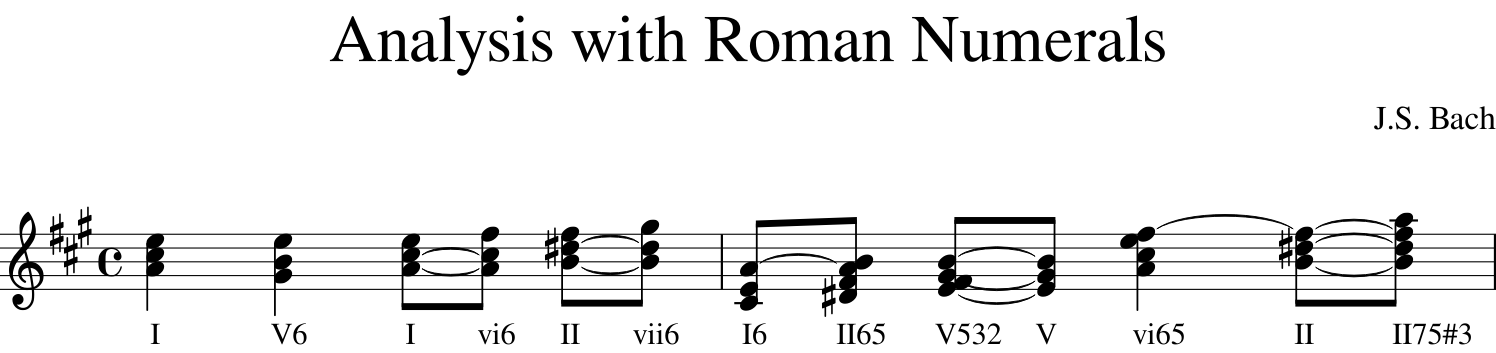

In [11]:
bChords = bwv30_6.chordify()                              # Slice the chords for each beat          
bChords.metadata.movementName = 'Chord reduction'         # Put a label to the score
#bChords.measures(0, 2).show()

for c in bChords.recurse().getElementsByClass('Chord'):   # This is a command used to simplify the chords
    c.closedPosition(forceOctave=4, inPlace=True)

for c in bChords.recurse().getElementsByClass('Chord'):   # This is where the analysis happens
    rn = roman.romanNumeralFromChord(c, key.Key('A'))     # We want to see the roman numerals for the different chords
    c.addLyric(str(rn.figure))

bChords.metadata.movementName = 'Analysis with Roman Numerals' #Add a title 
bChords.measures(0,2).show() # Show the result

# 2 Metrical analysis
Moving on to the temporal aspects of music, *Music21* has build-in metrical analysis module, which does Lerdahl-Jackendoff style metrical analysis. As you remember from your first year Analysis Module, this indicates how important are the different beats in the metrical hierarchy suggested by the time-signature.

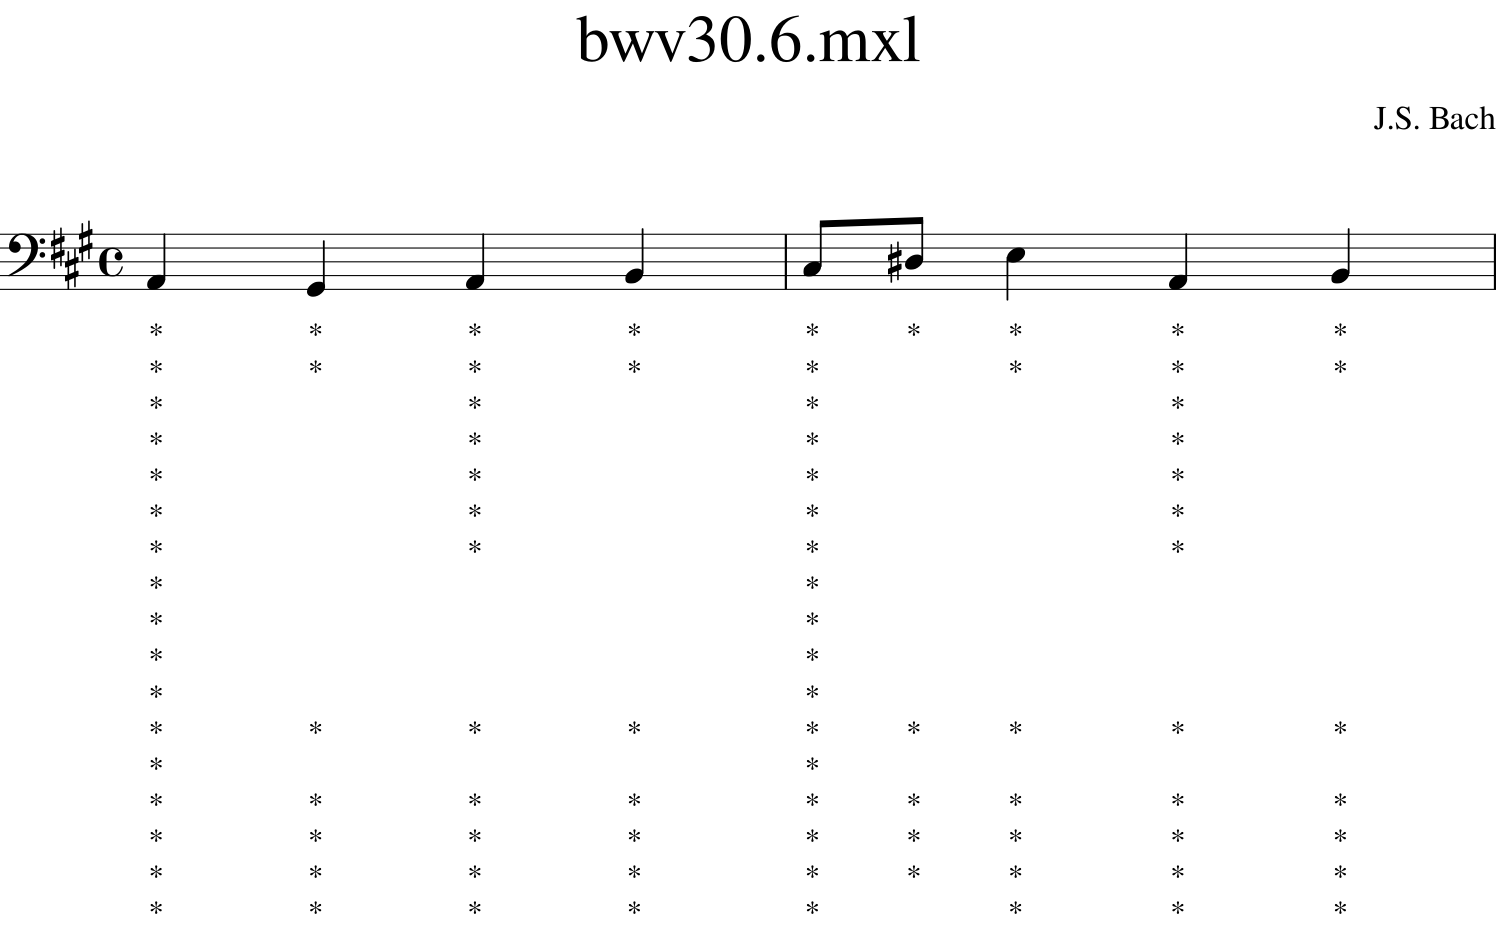

In [14]:
# Visualise metrical structures
from music21.analysis import metrical

# get just the bass part
bass = bwv30_6.getElementById('Bass')
# get measures 1 through 10
excerpt = bass.measures(1,2)
# apply a Lerdahl/Jackendoff-style metrical analysis to the piece.
metrical.labelBeatDepth(excerpt)
# display the results
excerpt.show()

# 3 Visualise the raw note events

We will now look at a piano roll representation of the first 5 bars of our score with the below command.

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score 0x7f82ddbb0650>>

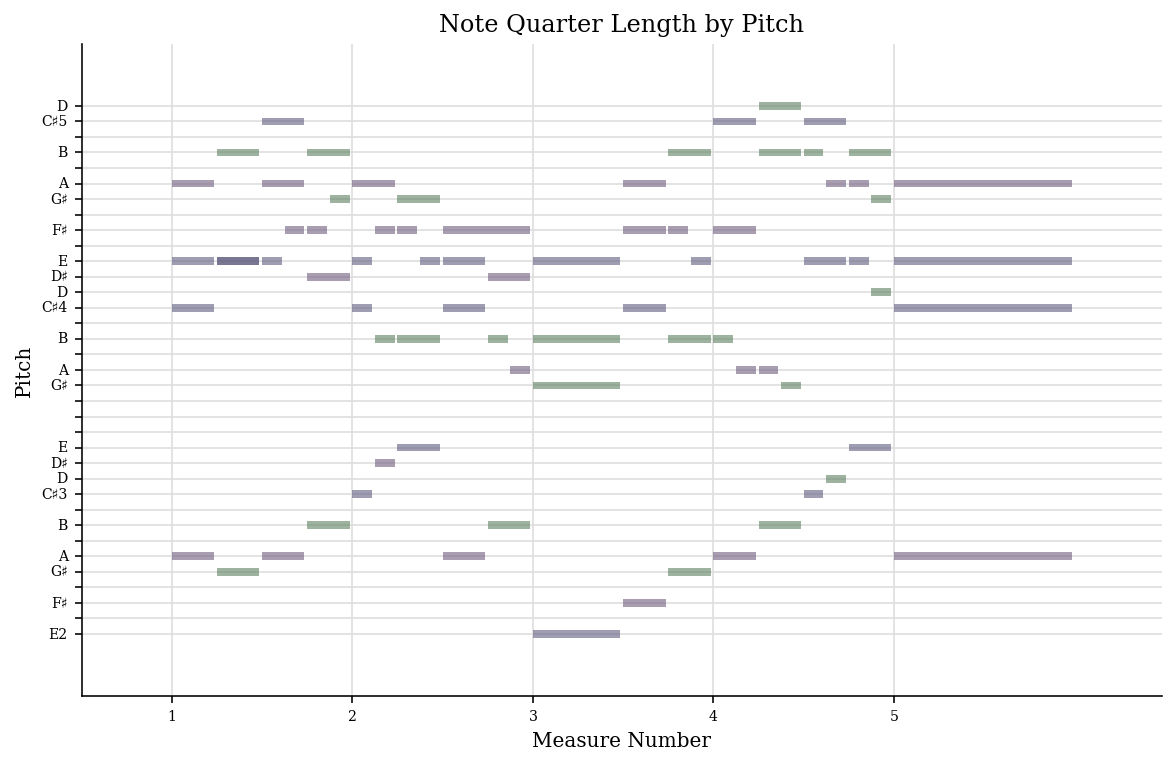

In [3]:
bwv30_6.measures(1, 5).plot()

## 3.2 Summary of note and duration frequencies

We can also look at the distribution of pitches (pitch-class distribution) in a histogram.

In [ ]:
bwv30_6.plot('histogram', 'pitchClass')

We can also look at the relationship between pitch class and note durations using a scatter plot.

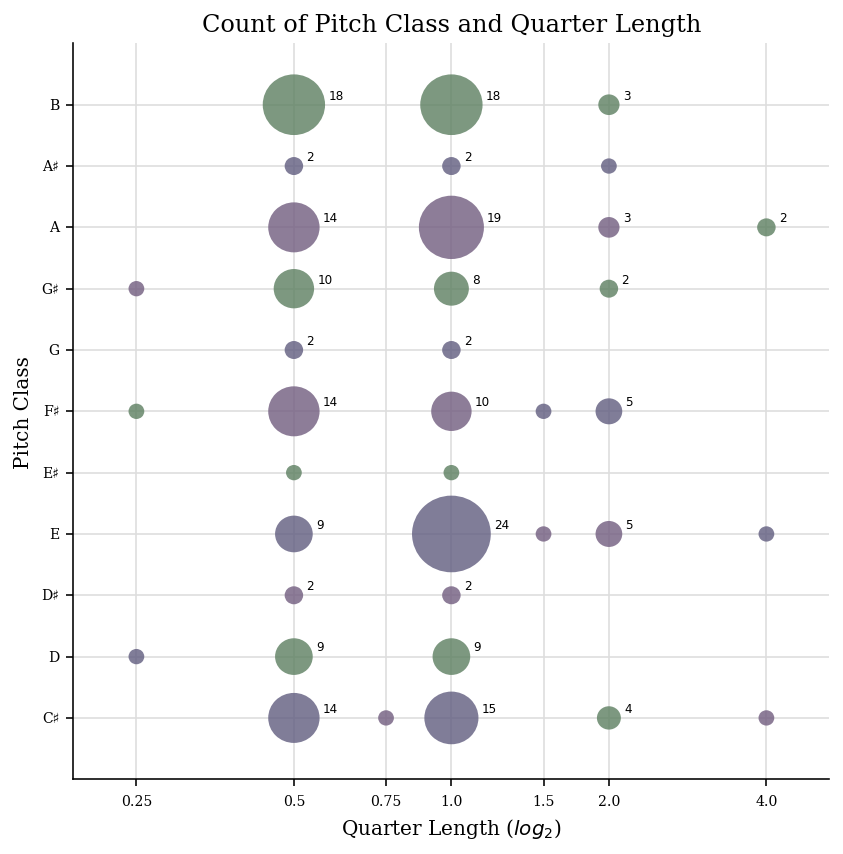

In [5]:
p = graph.plot.ScatterWeightedPitchClassQuarterLength(bwv30_6)
p.run()

## 3.3 Summary over time

Rather than looking at an accumulation of the notes, we can look at the pitch classes used over a number of bars, with the following command:

<music21.graph.plot.ScatterPitchClassOffset for <music21.stream.Score 0x7f82e6ea7290>>

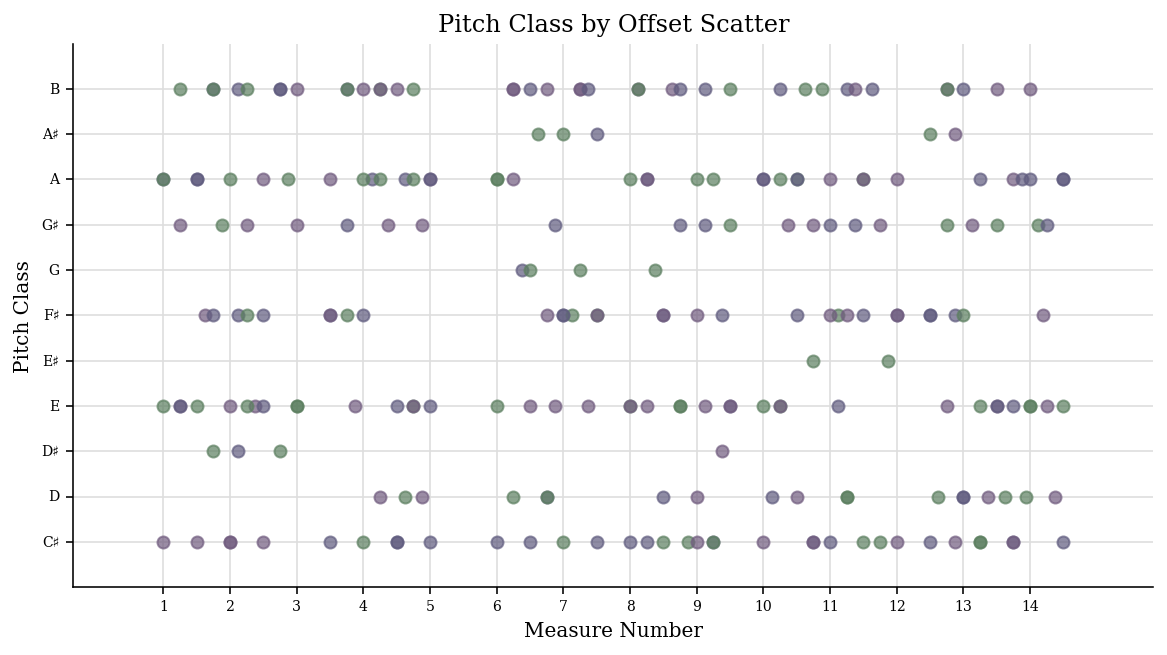

In [6]:
bwv30_6.plot('scatter', 'measure', 'pitchClass')